In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\ingredients.csv', sep='\t', encoding='latin-1')


C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_18564\2071597282.py:1: DtypeWarning: Columns (4,5,6,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\ingredients.csv', sep='\t', encoding='latin-1')


In [12]:
df.head()

,Code produit,Secteur,Famille,Code barre,Marque,Nom du produit,Dénomination de vente,Année de collecte la plus récente,Ingrédient,Type d'ingrédient,Source ingredients,Unité d'expression,Unité de mesure,Parent,Quantité,Rang,Ordre de saisie,Wording
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,lait ecreme reconstitue,_,Autres donnees emballage,_,_,NaN,NaN,1,1,NaN
1,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,sucre,_,Autres donnees emballage,_,%,NaN,10.8,2,2,NaN
2,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,fruit : framboise,_,Autres donnees emballage,_,%,NaN,6.0,3,3,NaN
3,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,creme,_,Autres donnees emballage,_,_,NaN,NaN,4,4,NaN
4,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,NaN,NaN,NaN,NaN,2007,"epaississants : amidon transforme de mais, gom...",_,Autres donnees emballage,_,_,NaN,NaN,5,5,NaN


In [13]:
df = df[["Code produit", "Secteur", "Ingrédient"]]
df.rename(columns={ 'Code produit': 'Code_produit' })
df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Exploratory_Data_Analysis\clean.csv')

In [14]:
df = df.rename(columns={ 'Code produit': 'Code_produit' })

In [15]:
resultat = df.Ingrédient.value_counts()
resultat


Ingrédient
sel                                                                                                      55146
sucre                                                                                                    42366
eau                                                                                                      41955
farine de ble                                                                                            16509
lait                                                                                                     15064
                                                                                                         ...  
fruits rouges (fraise, cerise, framboise, mure) : morceaux de fruits et puree concentree reconstituee        1
fraise : morceaux de fruits et puree concentree reconstituee                                                 1
cerise : morceaux de fruits et puree concentree reconstituee                                         

Certains ingrédients sont présents un grand nombre de fois

In [16]:
resultat = df.Secteur.value_counts()
resultat


Secteur
Plats cuisines surgeles                          136939
Glaces et sorbets                                119105
Produits traiteurs frais                         119038
Biscuits et gateaux industriels                   86057
Plats cuisines frais                              79442
Snacking surgele                                  65056
Plats cuisines ambiants                           60958
Produits laitiers et desserts frais               47927
Charcuterie                                       36008
Panification croustillante et moelleuse           27010
Aperitifs a croquer                               26932
Bouillons et potages                              24801
Chocolat et produits chocolates                   23725
Viennoiseries et desserts surgeles                23459
Sauces condimentaires                             22229
Boissons Rafraichissantes Sans Alcool             21075
Cereales pour le petit dejeuner                   19044
Aliments infantiles de diversification  

Tous les secteurs ne sont pas autant représentés dans la base de données
Certains secteurs sont présent 136 939 fois, d'autres 129 fois.

In [9]:
resultat = df.Code_produit.value_counts()
resultat[40000:46750]

Code_produit
55289    6
42970    6
56819    6
10993    6
56896    6
        ..
6825     1
10820    1
53215    1
10814    1
53873    1
Name: count, Length: 6750, dtype: int64

shape: (1048575, 3)
unique Sector count: 33


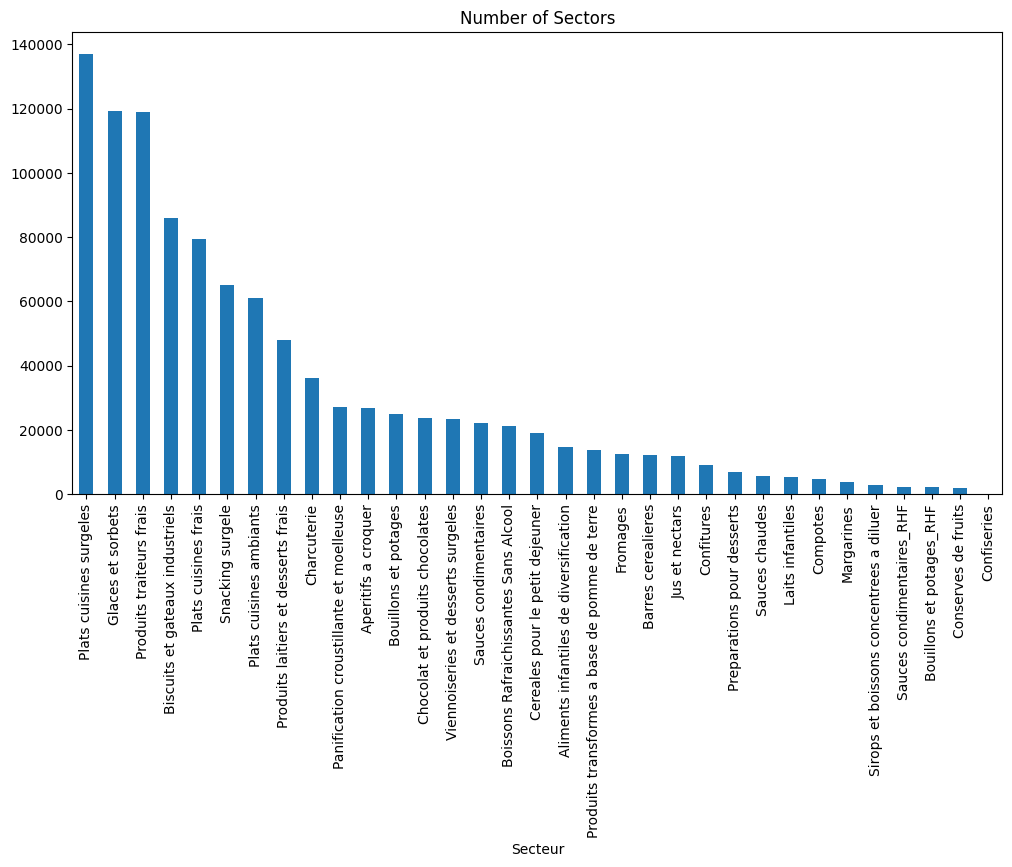

In [17]:
cuisines = df.Secteur.value_counts(sort=True)
cuisines.plot(kind="bar", figsize=(12,6), title="Number of Sectors")
print("shape:", df.shape)
print("unique Sector count:", len(df.Secteur.unique()))

In [20]:
from collections import Counter, defaultdict

# calculating the usage of each ingredient, and for each sector
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
# iterate each row
for index, row in df.iterrows():
    #print("index", index)
    #print("row", row)
    # get the counters
    row_counter = index_dict[row.Code_produit] 
    local_counter = cuisine_dict[row.Secteur]
    # count the ingredients usage
    arr = row.Ingrédient
    #print("arr", arr)
    key = arr.lower()
    # increment each word count
    total_counter[key] += 1
    local_counter[key] += 1
    row_counter[key] += 1
    # update the counters
    cuisine_dict[row.Secteur] = local_counter
    index_dict[row.Code_produit] = row_counter

<generator object DataFrame.iterrows at 0x000002A435B03890>

<Axes: title={'center': '10 Most Common Ingredients'}, xlabel='Ingrédient'>

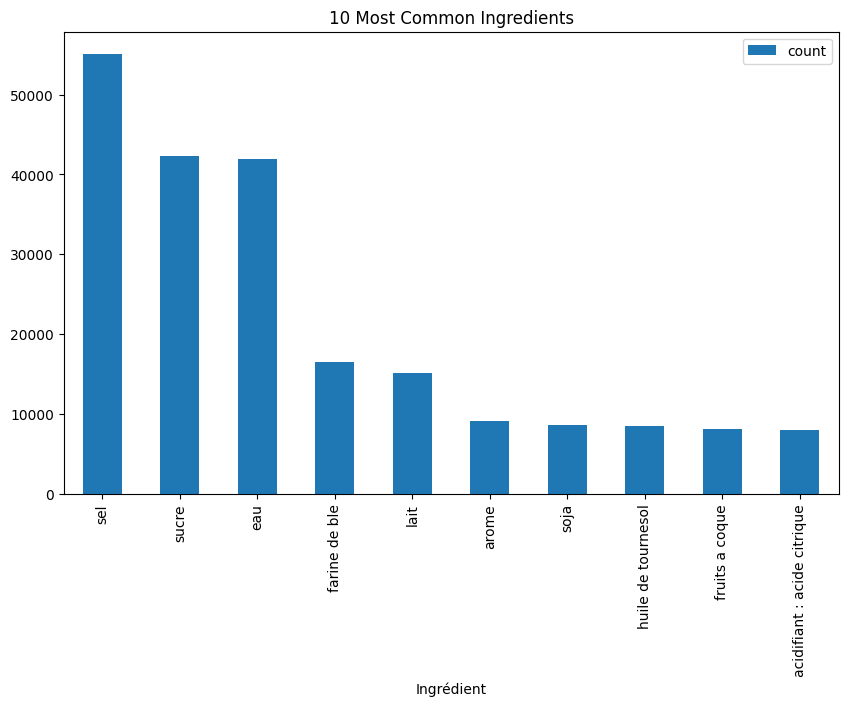

In [21]:
# plotting most common ingredients
most_common_ingredients = pd.DataFrame(total_counter.most_common(10), columns=["Ingrédient", "count"])
most_common_ingredients.plot(kind="bar", x="Ingrédient", figsize=(10,6), title="10 Most Common Ingredients")

In [22]:
from wordcloud import WordCloud

wordcloudobj = WordCloud( background_color='white')
wordcloud = wordcloudobj.generate_from_frequencies(total_counter.most_common(100))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most common ingredients")
plt.show()

AttributeError: 'list' object has no attribute 'items'

In [23]:
for key, value in cuisine_dict.items():
    wc = wordcloudobj.generate_from_frequencies(value.most_common(100))
    plt.imshow(wc)
    plt.title("100 most common ingredients for '%s' cuisine" % key)
    plt.axis("off")
    plt.show()

AttributeError: 'list' object has no attribute 'items'

In [ ]:
import matplotlib.pyplot as plt

# bar char plot of top 20 most common ingredients
for key, value in cuisine_dict.items():
    mc = pd.DataFrame(value.most_common(20), columns=["ingredient", "count"])
    mc.plot(kind="bar", x="ingredient", figsize=(10,6), title="20 Most Common Ingredients")   
    plt.title("20 most common ingredients for '%s' cuisine" % key)
    plt.show()

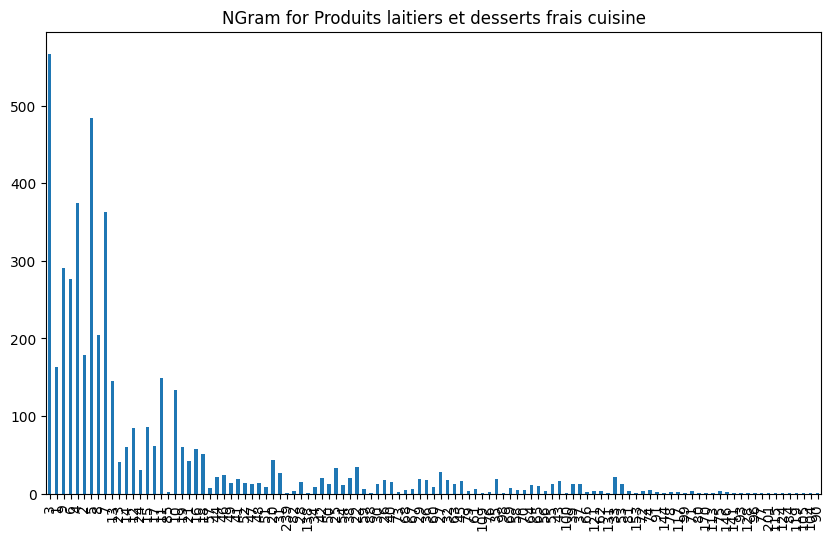

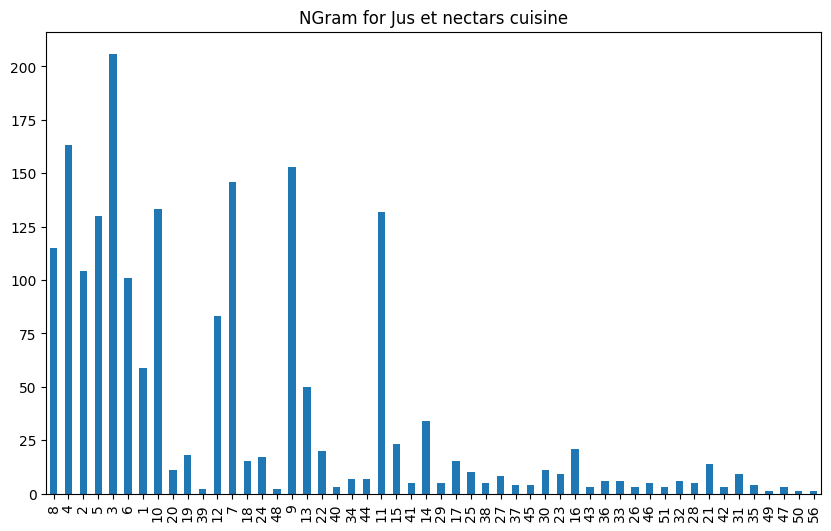

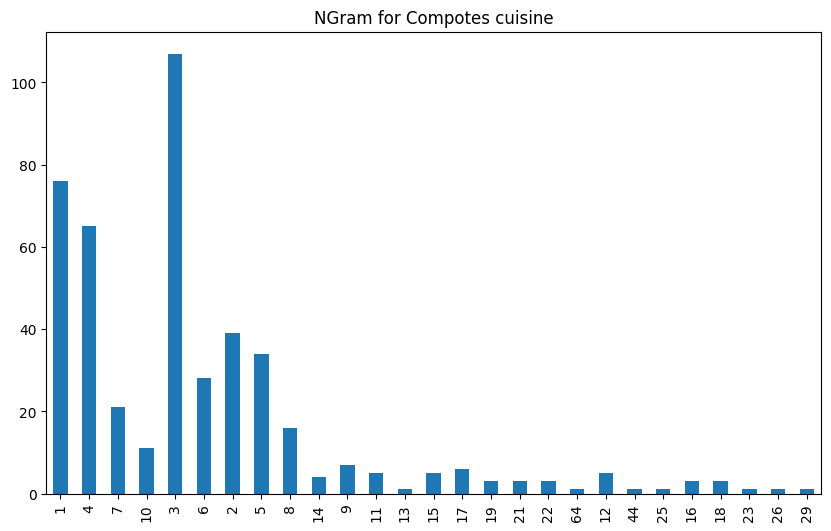

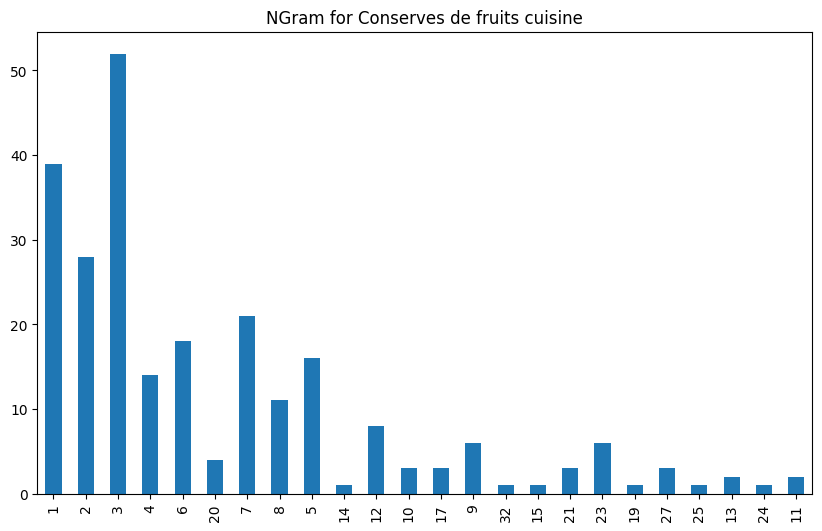

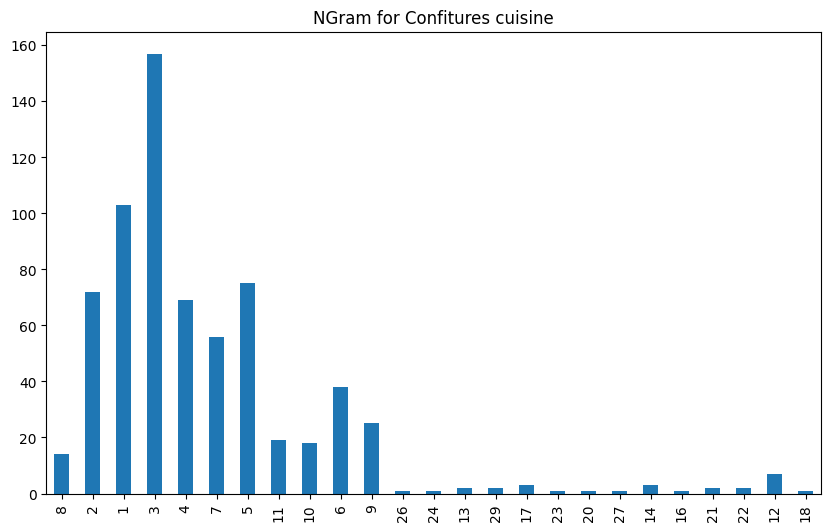

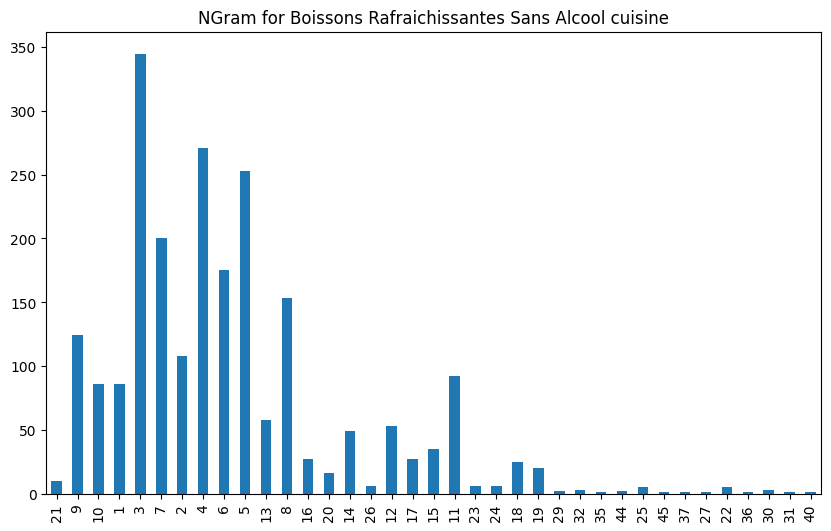

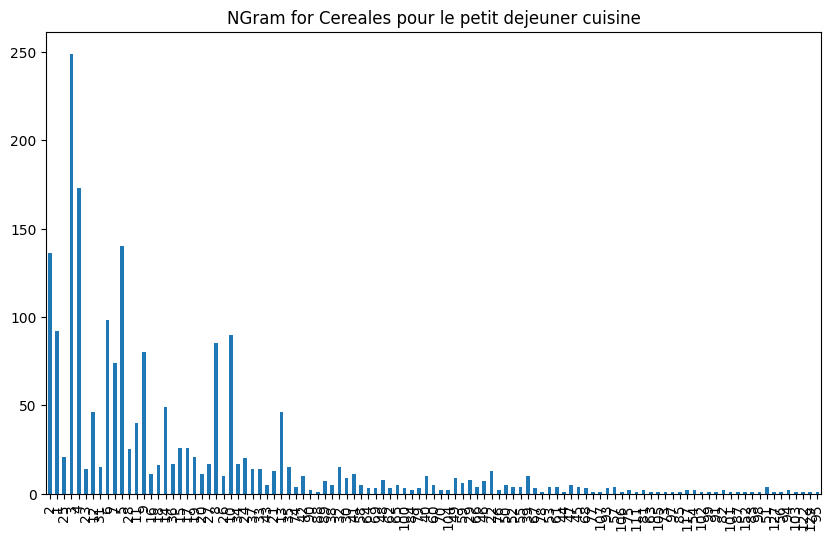

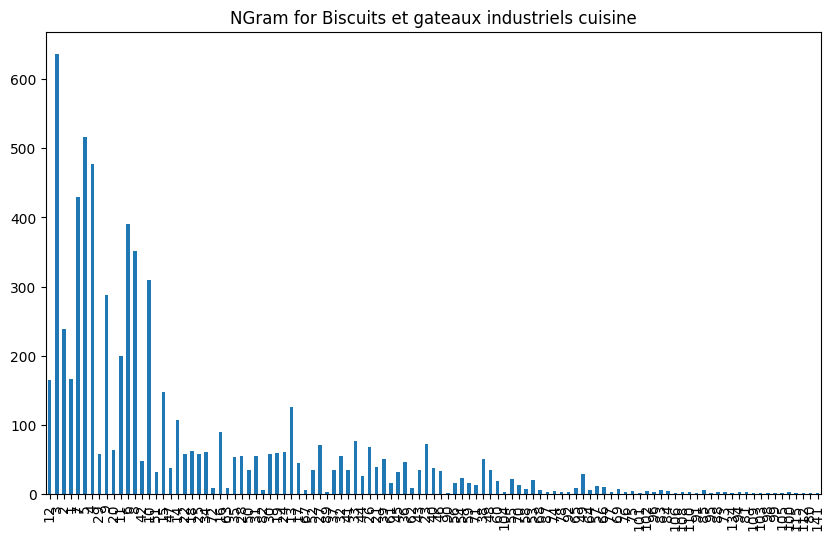

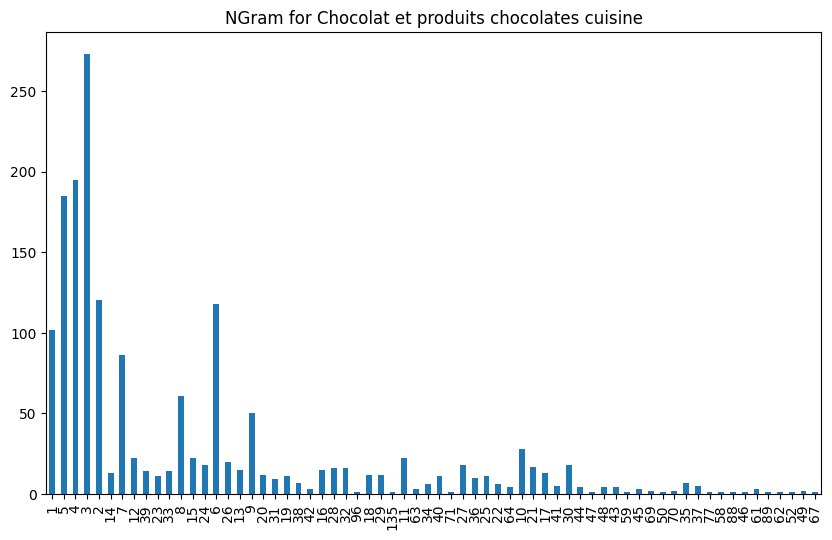

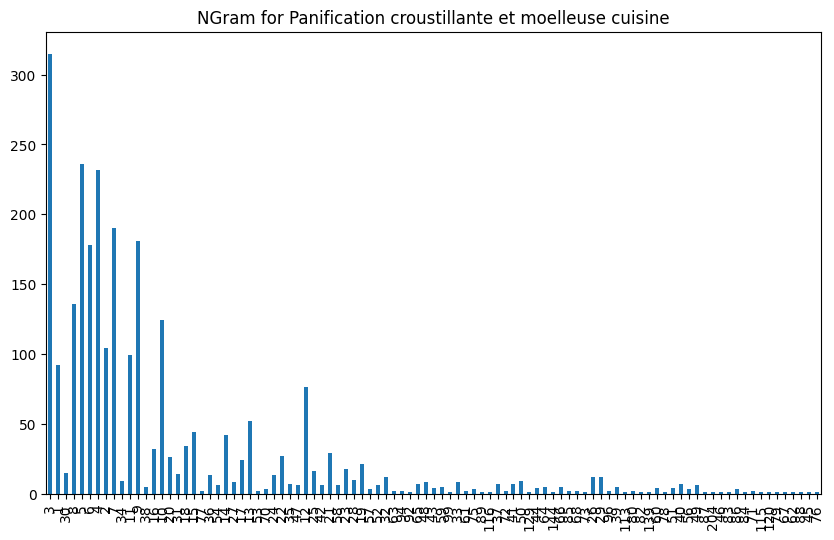

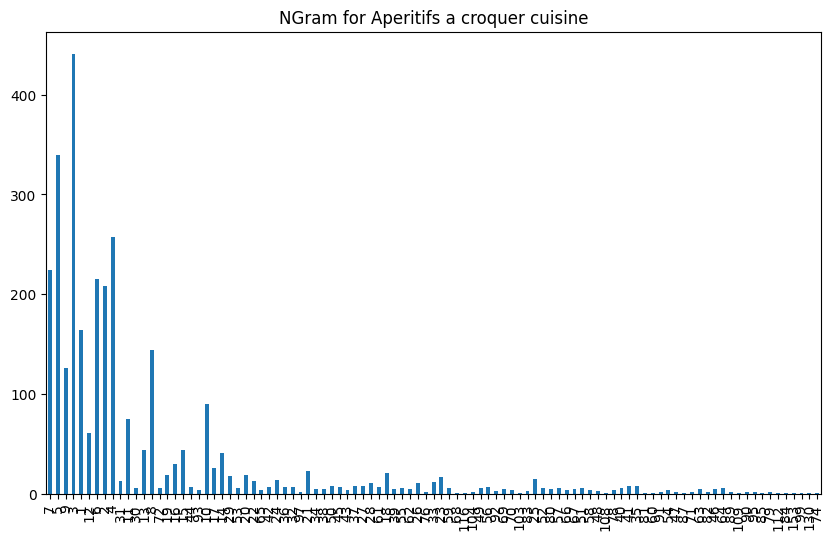

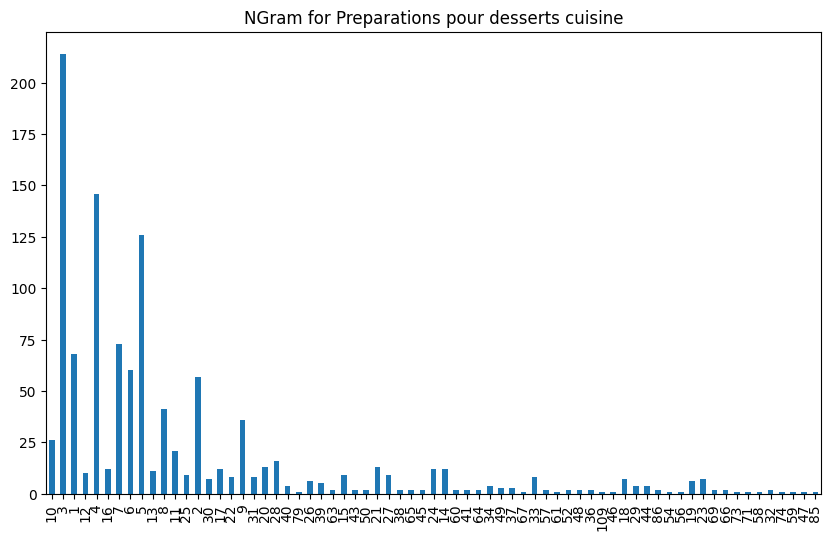

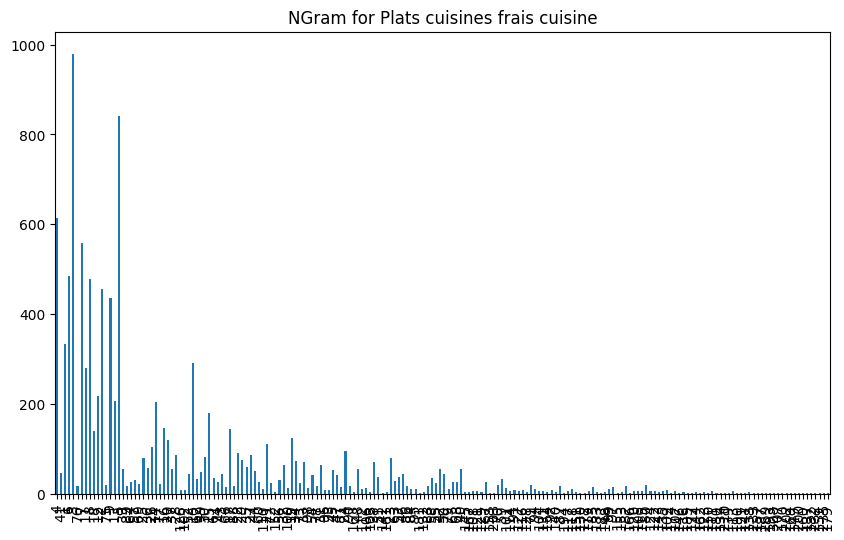

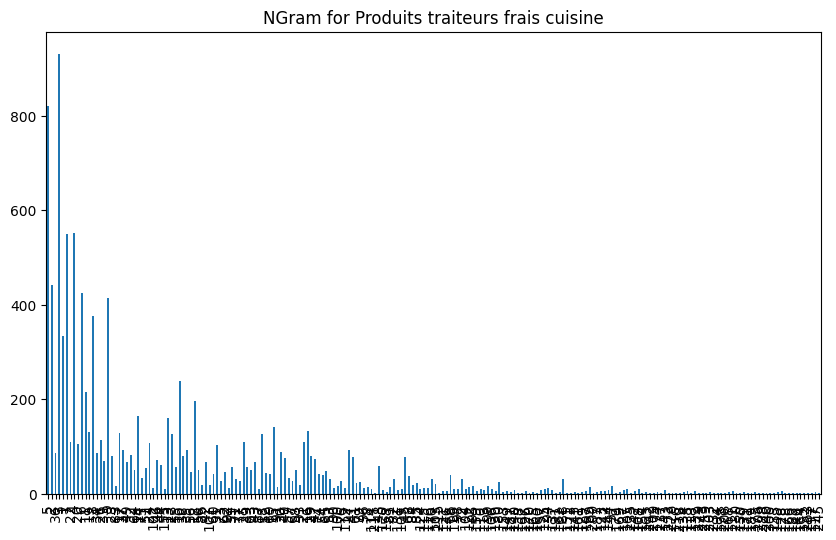

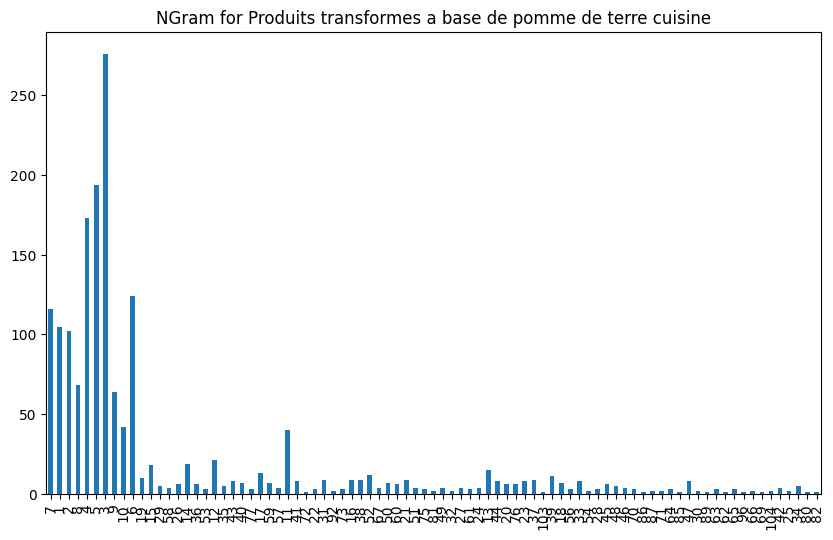

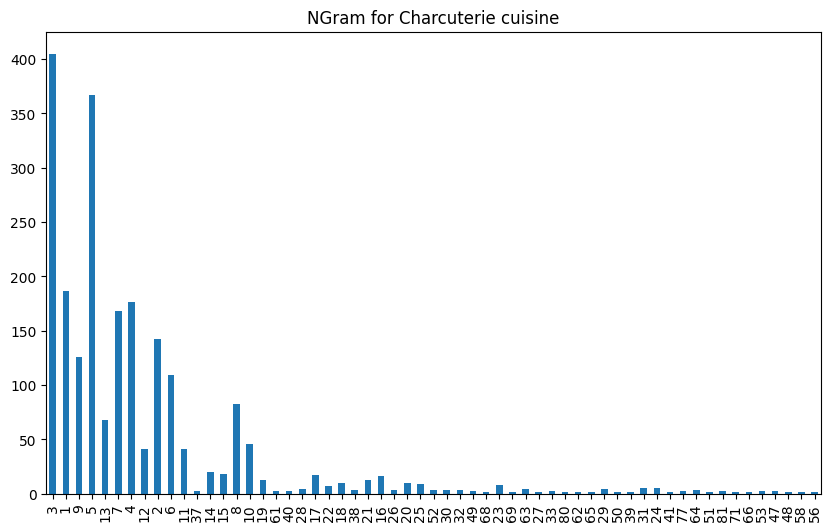

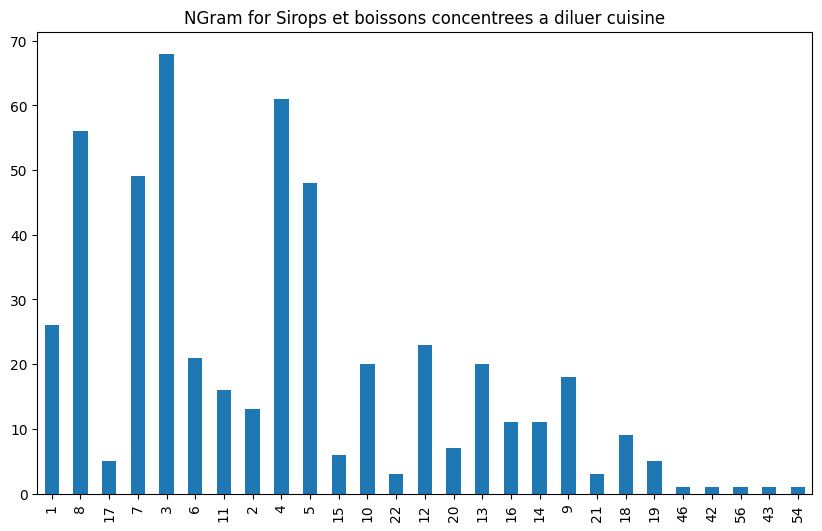

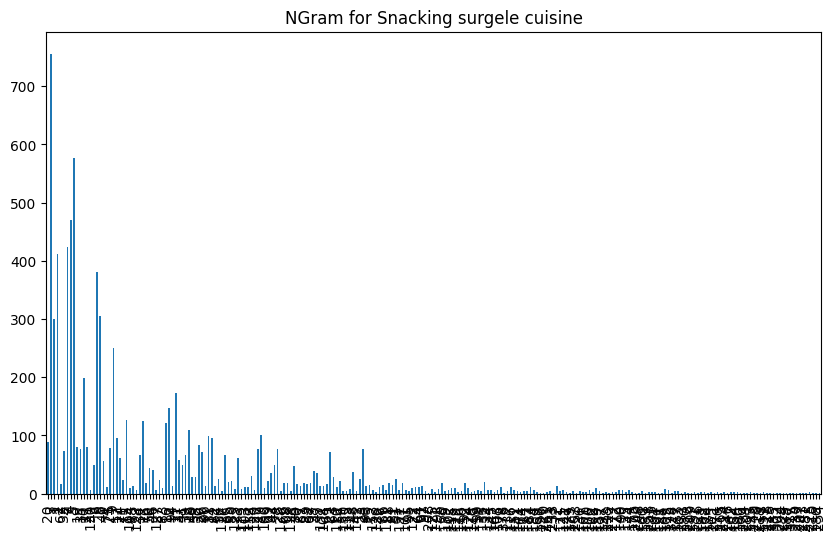

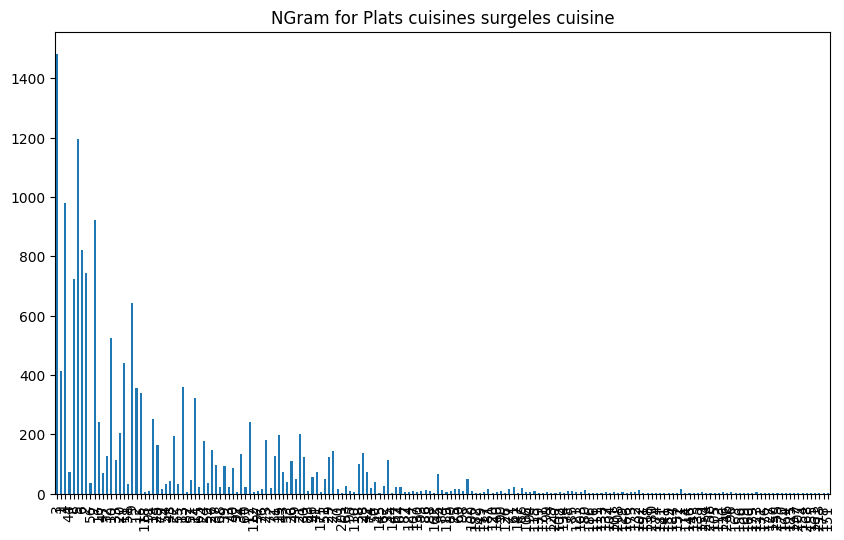

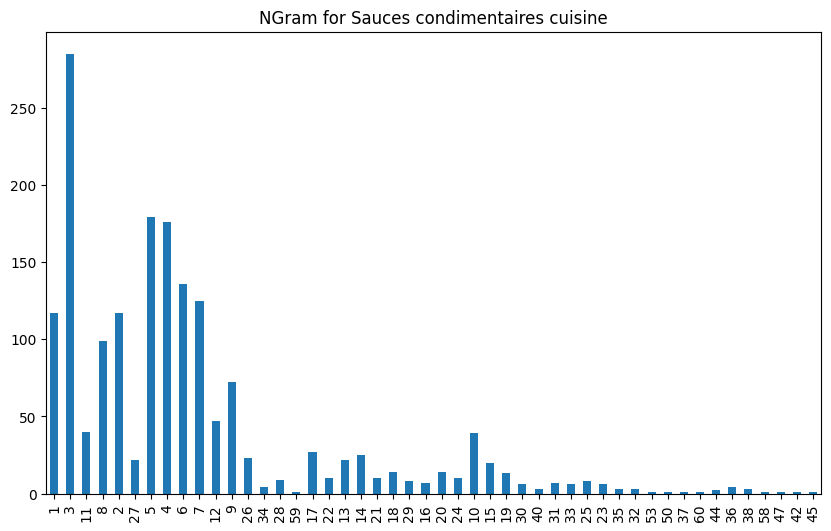

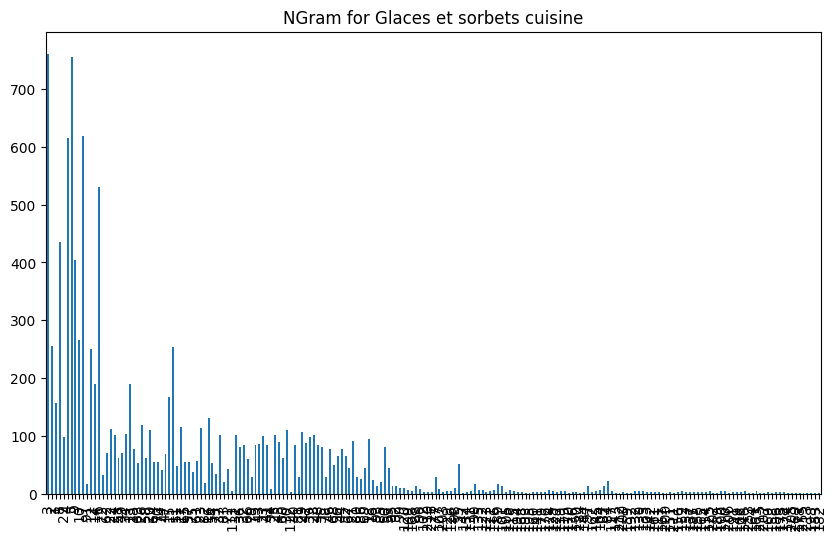

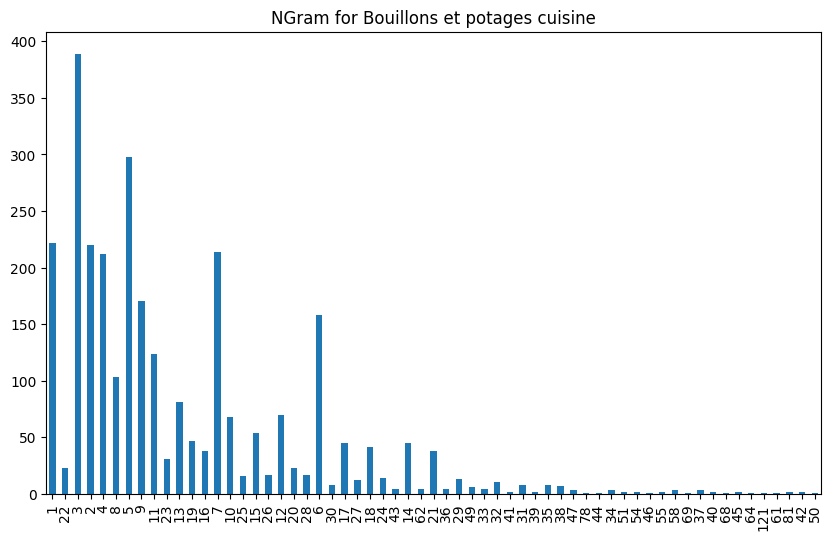

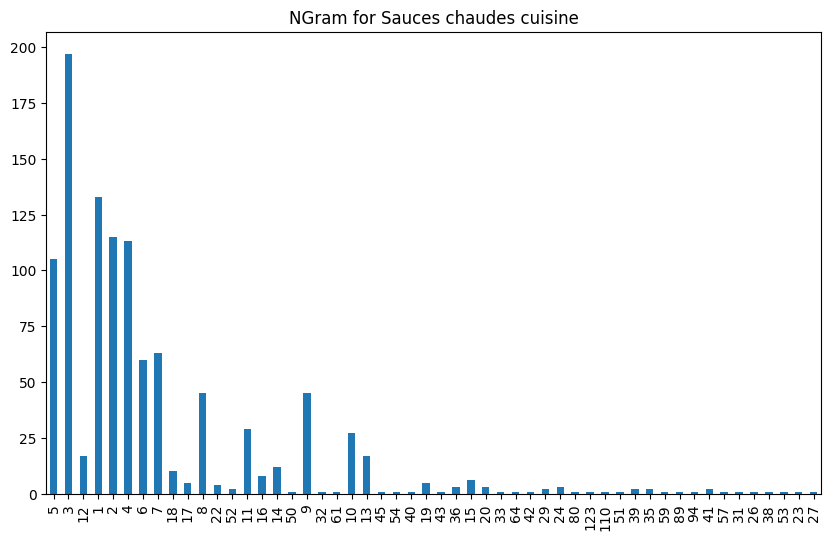

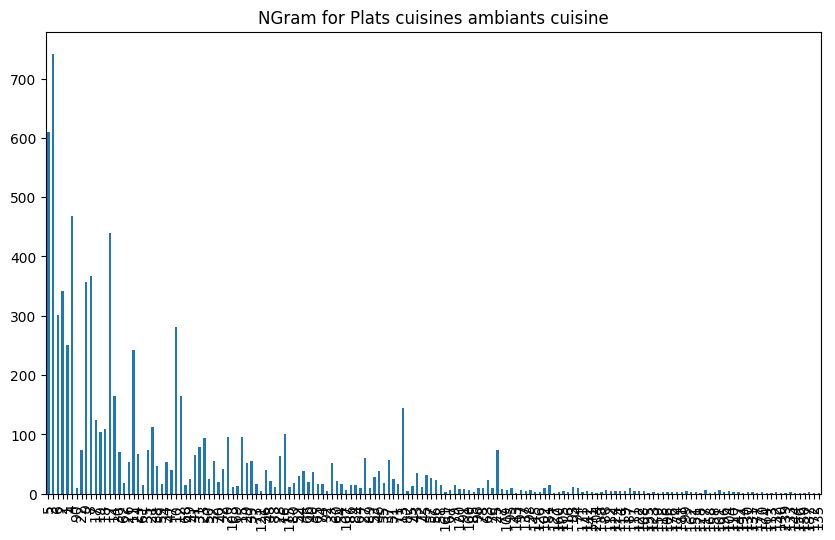

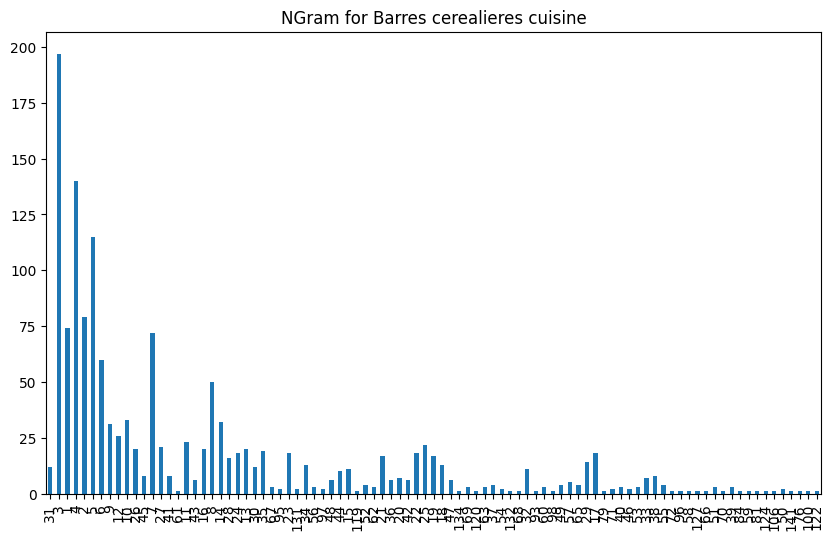

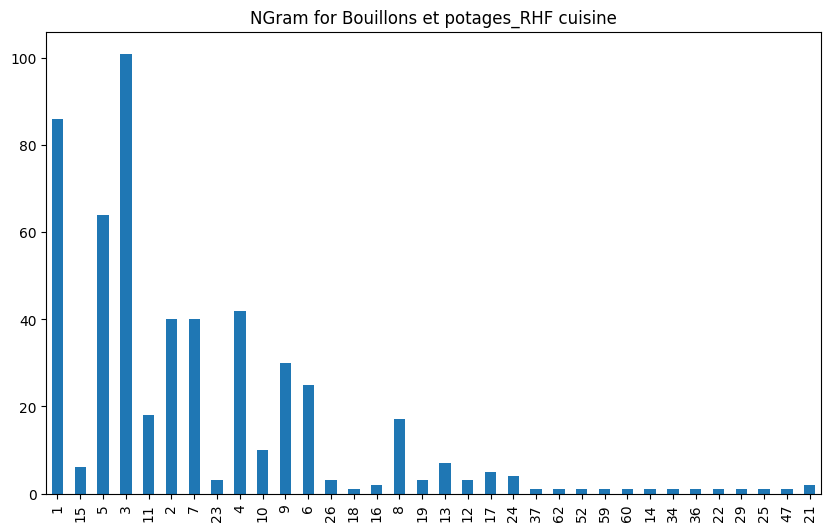

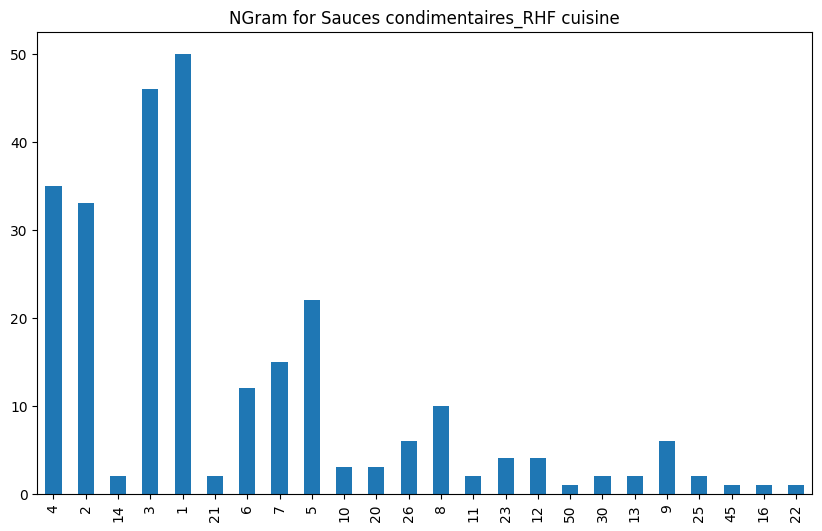

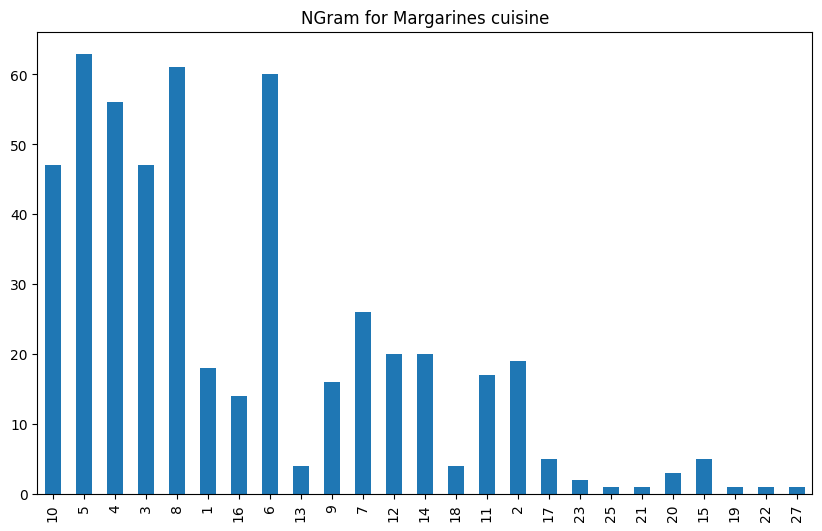

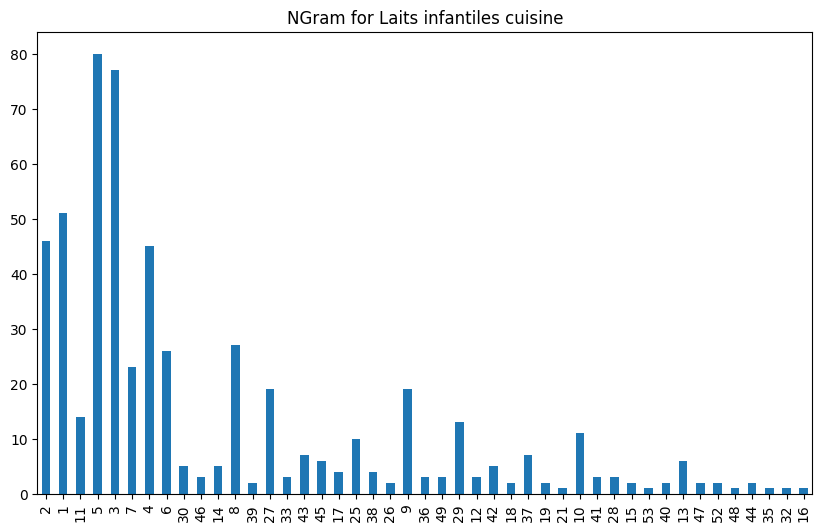

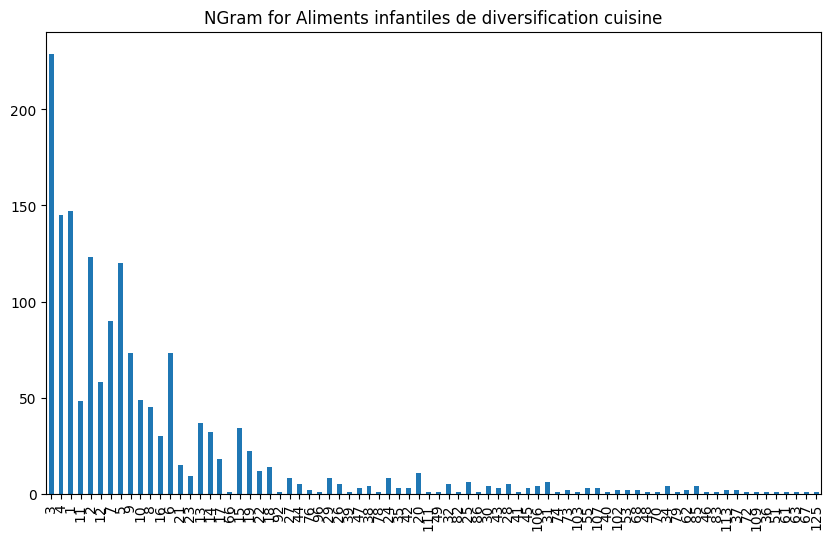

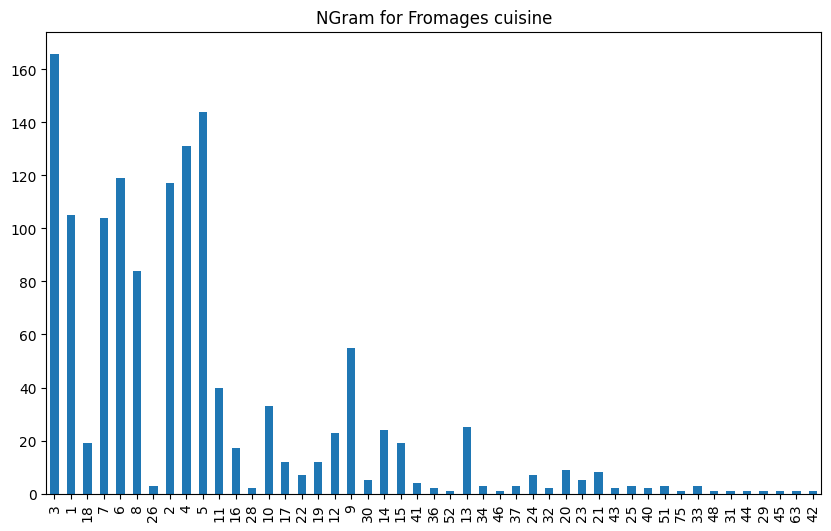

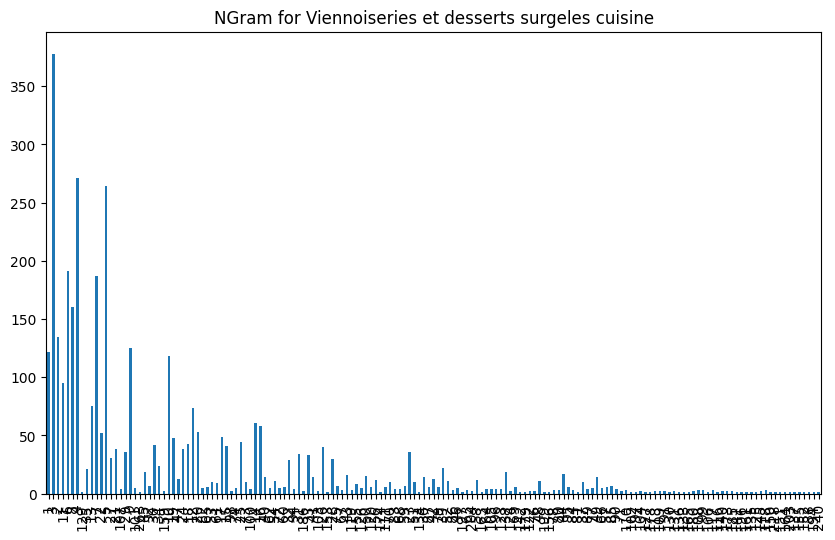

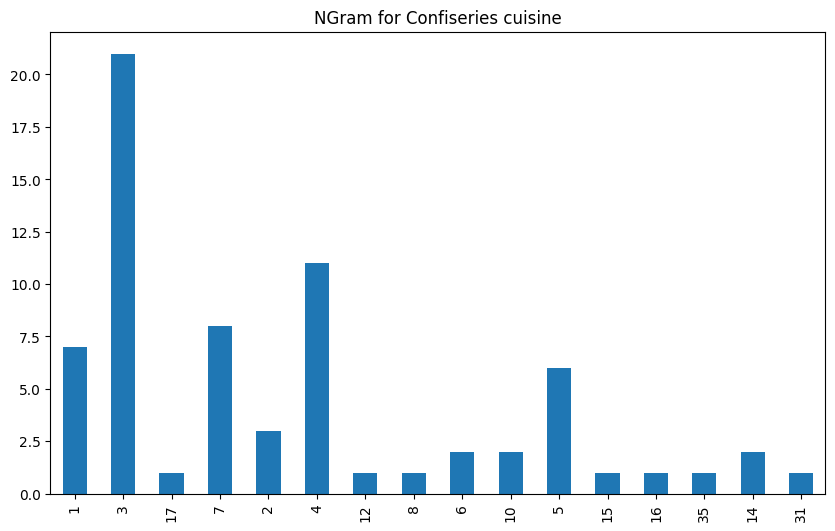

In [53]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# ngram range for each cuisine
stemmer = PorterStemmer()
ngram_counters = {}
for key, value in cuisine_dict.items():
    rng = [len(word_tokenize(stemmer.stem(wc))) for wc, val in value.items()]  
    local_ngram_counter = Counter(rng)
    ngram_counters[key] = local_ngram_counter
    local_series = pd.Series(local_ngram_counter)
    local_series.plot(kind="bar", figsize=(10,6), title="NGram for %s cuisine" % key)  
    plt.show()

In [68]:
# vector of ngram for each cuisine
ngram_index = {}
for key, value in ngram_counters.items():
    ngram_index[key] = dict(value)
df_ngram = pd.DataFrame.from_dict(ngram_index, orient='index')
df_ngram = df_ngram.fillna(0)
df_ngram[0:30]

,3,1,9,6,4,2,5,8,7,13,...,254,247,280,256,255,268,284,212,192,205
Produits laitiers et desserts frais,567,163,291.0,277,375,179,484,204,363,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jus et nectars,206,59,153.0,101,163,104,130,115,146,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compotes,107,76,7.0,28,65,39,34,16,21,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Conserves de fruits,52,39,6.0,18,14,28,16,11,21,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Confitures,157,103,25.0,38,69,72,75,14,56,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Boissons Rafraichissantes Sans Alcool,345,86,124.0,175,271,108,253,153,200,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cereales pour le petit dejeuner,249,92,80.0,98,173,136,140,85,74,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biscuits et gateaux industriels,637,166,288.0,390,478,238,517,351,430,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chocolat et produits chocolates,273,102,50.0,118,195,120,185,61,86,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Panification croustillante et moelleuse,315,92,181.0,178,232,104,236,136,190,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1   1      3.951511
2   2      4.753731
3   3     10.759708
4   4      7.048329
5   5      8.362831
6   6      5.172628
7   7      5.956171
8   8      4.379302
9   9      4.198758
10  10     3.024778
11  11     2.676142
12  12     2.120280
13  13     1.897935
14  14     1.660471
15  15     1.538626
16  16     1.249578
17  17     1.183763
18  18     1.125064
19  19     1.029901
20  20     0.972981
21  21     0.950746
22  22     0.873370
23  23     0.892937
24  24     0.810224
25  25     0.806667
26  26     0.791547
27  27     0.755083
28  28     0.699941
29  29     0.696384
30  30     0.698163
31  31     0.715950
32  32     0.608335
33  33     0.616340
34  34     0.611003
35  35     0.599441
36  36     0.535406
37  37     0.524734
38  38     0.508725
39  39     0.506946
40  40     0.467813
41  41     0.473150
42  42     0.439353
43  43     0.420676
44  44     0.422455
45  45     0.427791
46  46     0.376207
47  47     0.385991
48  48     0.355752
49  49     0.349526
50  50     0.337964


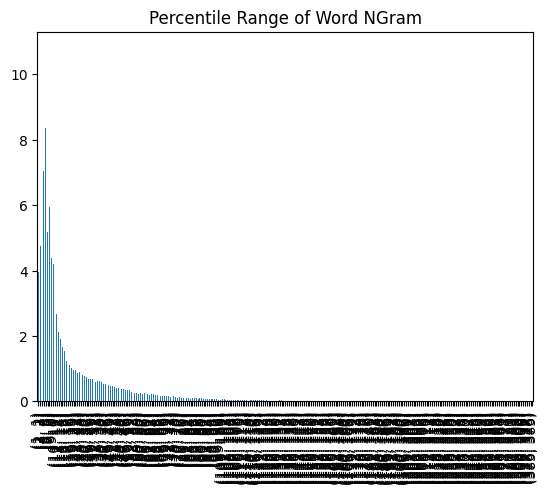

In [74]:
# getting the percentage of ngram for each cuisines
totalcount = df_ngram.sum().sum()
ngram_sum = df_ngram.sum().groupby(level=0).apply(lambda x: 100*x/float(totalcount))
ngram_sum.plot(kind="bar", title="Percentile Range of Word NGram")
ngram_sum[0:50]

In [75]:
# get a vector of cuisines and ingredients
index1 = {}
for key, value in cuisine_dict.items():
    index1[key] = dict(value)
df1 = pd.DataFrame.from_dict(index1, orient='index')
df1 = df1.fillna(0)
cuisine_labels = [key for key, value in df1.iterrows()]
ingredients_labels = list(df1.columns)

# calculating the table of probabilities for the cuisines
inst_count=df1.sum(axis='columns')
df1_prob= df1.div(inst_count,axis='rows')

In [78]:
import numpy as np
from sklearn.manifold import MDS

mds = MDS(n_components=2,  random_state=1)
X = mds.fit_transform(df1_prob.astype(np.float64))
x1 = X[:,0]
y1 = X[:,1]

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


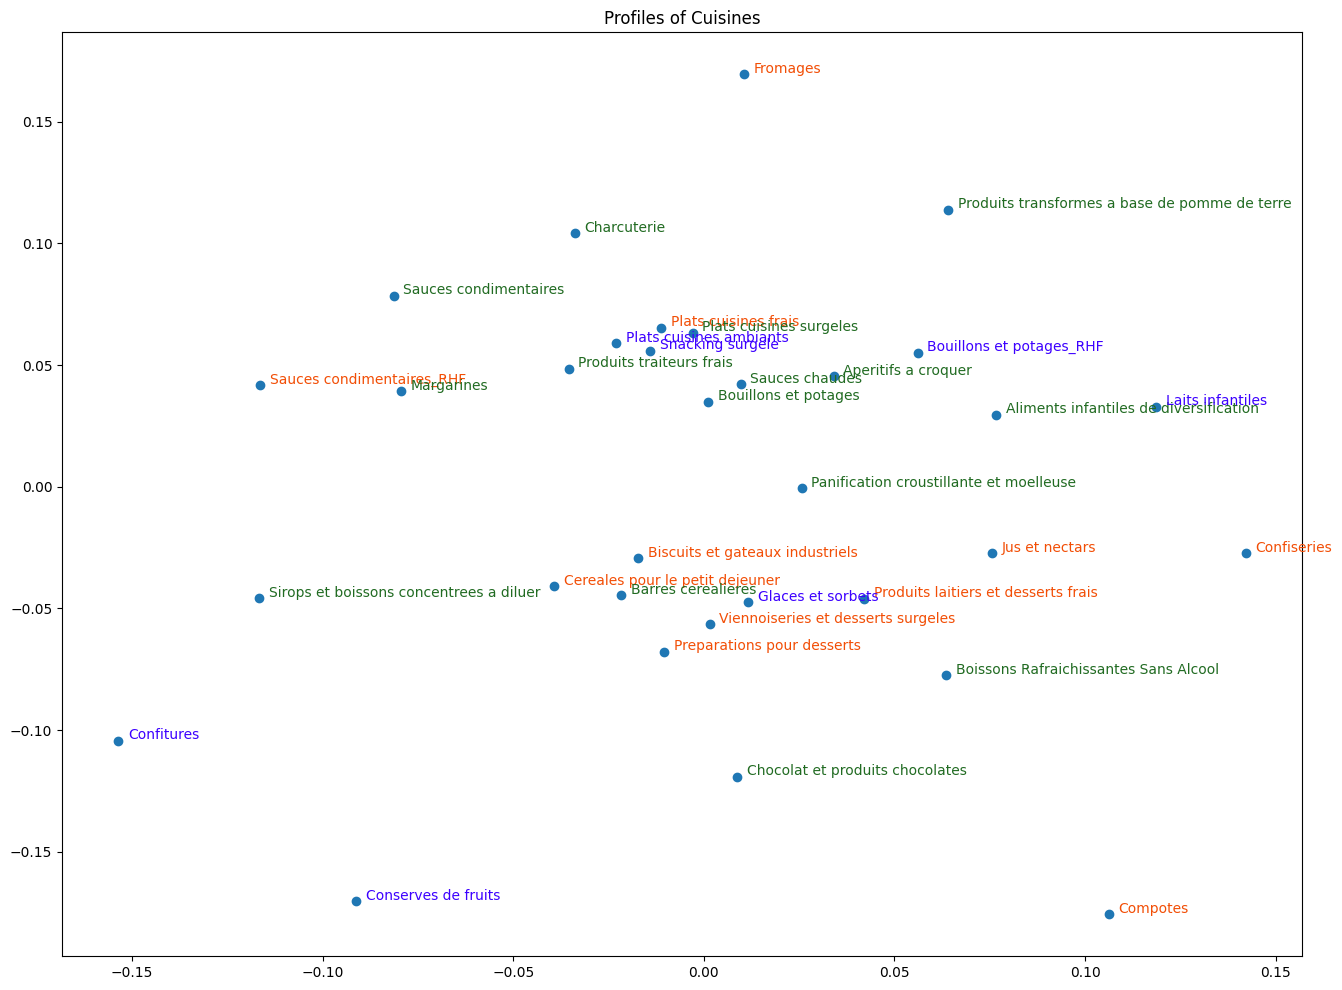

In [81]:
import matplotlib.pylab as pyl
pyl.rcParams['figure.figsize'] = (16.0, 12.0)

fig, ax = plt.subplots()
ax=plt.scatter(x1,y1)
plt.title('Profiles of Cuisines')

colors = {"Plats cuisines surgeles":    '#216b22',
"Glaces et sorbets":      '#3c00ff',
"Produits traiteurs frais": '#216b22',
"Biscuits et gateaux industriels"   :      '#f24e06',
"Plats cuisines frais":     '#f24e06',
"Snacking surgele":       '#3c00ff',
"Plats cuisines ambiants":        '#3c00ff',
"Produits laitiers et desserts frais":       '#f24e06',
"Charcuterie":     '#216b22',
"Panification croustillante et moelleuse":    '#216b22',
"Aperitifs a croquer":    '#216b22',
"Bouillons et potages":     '#216b22',
"Chocolat et produits chocolates":    '#216b22',
"Viennoiseries et desserts surgeles":         '#f24e06',
"Sauces condimentaires":    '#216b22',
"Boissons Rafraichissantes Sans Alcool":    '#216b22',
"Cereales pour le petit dejeuner":         '#f24e06',
"Aliments infantiles de diversification":    '#216b22',
"Produits transformes a base de pomme de terre":    '#216b22',
"Fromages":         '#f24e06',
"Barres cerealieres":    '#216b22',
"Jus et nectars":         '#f24e06',
"Confitures":      '#3c00ff',
"Preparations pour desserts":         '#f24e06',
"Sauces chaudes":    '#216b22',
"Laits infantiles":      '#3c00ff',
"Compotes":         '#f24e06',
"Margarines":    '#216b22',
"Sirops et boissons concentrees a diluer":    '#216b22',
"Sauces condimentaires_RHF":         '#f24e06',
"Bouillons et potages_RHF":      '#3c00ff',
"Conserves de fruits":      '#3c00ff',
"Confiseries":         '#f24e06',
}

for i, name in enumerate(cuisine_labels):
    plt.annotate(name, (x1[i], y1[i]), color=colors[name], xytext=(7,1), textcoords='offset points')
    
plt.show()